In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [54]:
auxfuneral_df = pd.read_csv('../../dados/df_auxfuneral.csv', sep = ';', index_col = False, header=0)
print(len(auxfuneral_df))
auxfuneral_df.sample(5)

6730


,Unnamed: 0,Unnamed: 0.1,Sigla da UGC,Código da UGC,Código da UGE,Nome da UGE,Despesa Gerencial,Detalhamento da Despesa Gerencial,Código da Ação do Orçamento,Nome da Ação do Orçamento,...,Descrição do Item GBP,Licitação,Contrato,CEO,Observação da Liquidação,Valor Liquidado,Total Estornado,Total Líquido,AnoMes,Ano
5306,2918719,186765,FES-PE,530400,530401,FUNDO ESTADUAL DE SAÚDE,CUSTEIO,Auxílio Funeral,602,Manutenção do Pessoal da Secretaria de Saúde e...,...,-,-,-,-,LIQUIDAÇÃO DA DESPESA DE AUXÍLIO FUNERAL DO EX...,1030.97,0.0,1030.97,201911,2019
6333,3474694,168299,DER-PE,650200,650201,DEPARTAMENTO DE ESTRADAS E RODAGEM DO ESTADO D...,CUSTEIO,Auxílio Funeral,4356,Gestão das Atividades do Departamento de Estra...,...,-,-,-,-,VALOR REFERENTE AUXILIO FUNERAL EX-SERVIDOR J...,1476.99,0.0,1476.99,202006,2020
6388,3502132,195737,ENCARGOS-SARE,290100,290101,RECURSOS SOB SUPERVISAO DA SARE,CUSTEIO,Auxílio Funeral,2853,Encargos com Auxílio Funeral de Inativos da Ad...,...,-,-,-,-,"LIQUIDAÇÃO DA 2020NE000014, REF. AO PAGAMENTO ...",32805.14,0.0,32805.14,202001,2020
6428,3502172,195777,ENCARGOS-SARE,290100,290101,RECURSOS SOB SUPERVISAO DA SARE,CUSTEIO,Auxílio Funeral,2853,Encargos com Auxílio Funeral de Inativos da Ad...,...,-,-,-,-,"LIQUIDAÇÃO DA 2020NE00130, REF. AO PAGAMENTO D...",1894.85,0.0,1894.85,202003,2020
3694,2071827,484676,ENCARGOS-SARE,290100,290101,RECURSOS SOB SUPERVISAO DA SARE,CUSTEIO,Auxílio Funeral,2853,Encargos com Auxílio Funeral de Inativos da Ad...,...,-,-,-,-,LIQUIDAÇÃO DA 2017NE000393.REF. AO PAGAMENTO D...,3100.00,0.0,3100.00,201705,2017


In [55]:
auxfuneral_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Sigla da UGC', 'Código da UGC',
       'Código da UGE', 'Nome da UGE', 'Despesa Gerencial',
       'Detalhamento da Despesa Gerencial', 'Código da Ação do Orçamento',
       'Nome da Ação do Orçamento', 'Código da Subação do Orçamento',
       'Nome da Subação', 'Tipo da Prioridade de Subação',
       'Indicador de DEA (Despesa de Exercício Anterior)',
       'Código da Fonte de Recurso', 'Descrição da Fonte de Recurso',
       'Número do Empenho', 'Data do Empenho',
       'CPF, CNPJ, IG ou UG/Gestão do Credor',
       'Nome ou Razão Social do Credor', 'Número do DH', 'Competência do DH',
       'Número da Liquidação', 'Data da Liquidação', 'Mês da Liquidação',
       'Grupo da Despesa', 'Modalidade de Aplicação', 'Elemento da Despesa',
       'Descrição do Elemento da Despesa', 'Código do Item de Gasto',
       'Descrição do Item de Gasto', 'Descrição do Item Externo',
       'Código do Item GBP', 'Descrição do Item GBP', 'Licitação', 'Contrato',

In [56]:
auxfuneral_grouped_df = auxfuneral_df.groupby(['Data da Liquidação']).count()
auxfuneral_grouped_df.reset_index(inplace=True)
auxfuneral_grouped_df = auxfuneral_grouped_df.rename(columns={'Unnamed: 0': 'Qtd'})
auxfuneral_grouped_df = auxfuneral_grouped_df[['Data da Liquidação','Qtd']]
auxfuneral_grouped_df.head()

,Data da Liquidação,Qtd
0,2014-01-02,1
1,2014-01-13,1
2,2014-01-16,1
3,2014-01-21,2
4,2014-01-22,1


In [57]:
auxfuneral_grouped_df['Data'] = pd.to_datetime(auxfuneral_grouped_df['Data da Liquidação'])    
auxfuneral_grouped_df['Data_Delta'] = (auxfuneral_grouped_df['Data'] - auxfuneral_grouped_df['Data'].min())  / np.timedelta64(1,'D')
auxfuneral_grouped_df.head()

,Data da Liquidação,Qtd,Data,Data_Delta
0,2014-01-02,1,2014-01-02,0.0
1,2014-01-13,1,2014-01-13,11.0
2,2014-01-16,1,2014-01-16,14.0
3,2014-01-21,2,2014-01-21,19.0
4,2014-01-22,1,2014-01-22,20.0


In [58]:
dados_df = auxfuneral_grouped_df[['Data_Delta','Qtd']]
print(dados_df.shape)
dados_df.head()

(1407, 2)


,Data_Delta,Qtd
0,0.0,1
1,11.0,1
2,14.0,1
3,19.0,2
4,20.0,1


In [59]:
X = dados_df.iloc[:,0].values
y = dados_df.iloc[:,1].values
print(X)
print(y)

[   0.   11.   14. ... 2387. 2388. 2391.]
[ 1  1  1 ...  1  2 18]


In [60]:
correlacao = np.corrcoef(X,y)
correlacao

array([[ 1.        , -0.02591347],
       [-0.02591347,  1.        ]])

In [63]:
X = X.reshape(-1,1)
X

array([[   0.],
       [  11.],
       [  14.],
       ...,
       [2387.],
       [2388.],
       [2391.]])

In [64]:
from sklearn.linear_model import LinearRegression
modeloReg = LinearRegression()
modeloReg.fit(X,y)

LinearRegression()

In [65]:
modeloReg.coef_

array([-0.00013944])

In [66]:
modeloReg.intercept_

4.951067800106688

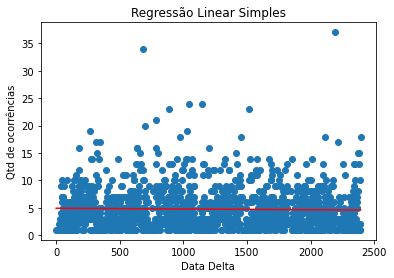

In [67]:
plt.scatter(X,y)
plt.title("Regressão Linear Simples")
plt.xlabel("Data Delta")
plt.ylabel("Qtd de ocorrências")
# desenhar a reta
plt.plot(X, modeloReg.predict(X), color='red')


In [72]:
data = '2020-08-18'
data_df = pd.DataFrame([data], columns=['data'])
data_df['data_formatada'] = pd.to_datetime(data_df['data'])

entrada_modelo1 = ((data_df['data_formatada'] - auxfuneral_grouped_df['Data'].min())  / np.timedelta64(1,'D'))
entrada_modelo1 = np.array(entrada_modelo1).reshape(-1,1)
print(entrada_modelo1)

[[2420.]]


In [73]:
previsao1 = modeloReg.predict(entrada_modelo1)
previsao1

array([4.61361999])

In [74]:
#y = ax + b
previsao2 = modeloReg.coef_ * entrada_modelo1 + modeloReg.intercept_
previsao2

array([[4.61361999]])

In [75]:
score = modeloReg.score(X,y)
score

0.0006715077293368843

c:\users\thiego\anaconda3\envs\projeto_md\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


<bound method Visualizer.poof of ResidualsPlot(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000009D4785D7C8>,
              line_color=None, model=None, test_alpha=None, test_color=None,
              train_alpha=None, train_color=None)>

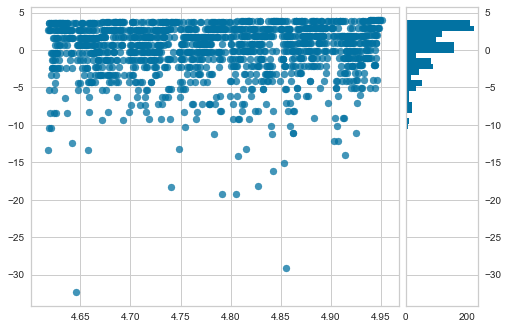

In [83]:
#!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(modeloReg)
visualizador.fit(X,y)
visualizador.poof